# **Proyek Pertama: Menyelesaikan Permasalahan Human Resources Jaya Jaya Maju**

---

*   Nama : Faishal Anwar Hasyim
*   Email : anwarfaishal86@gmail.com
*   Id Dicoding : anwarfaishal86

# Persiapan

**Menyiapkan Library yang dibutuhkan**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix # Import with alias
from xgboost import XGBClassifier

# Data Understanding

In [53]:
employees_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv",
    encoding='windows-1252'
)
employees_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [54]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [55]:
employees_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [56]:
employees_df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [57]:
clean_df = employees_df
clean_df = clean_df.dropna()

In [58]:
clean_df.columns = ["employee_id",
                    "age"	,
                    "attrition",
                    "business_travel",
                    "daily_rate",
                    "department",
                    "distance_from_home",
                    "education",
                    "education_field",
                    "employee_count",
                    "environment_satisfaction",
                    "gender",
                    "hourly_rate",
                    "job_involvement",
                    "job_level",
                    "job_role",
                    "job_satisfaction",
                    "marital_status",
                    "monthly_income",
                    "monthly_rate",
                    "num_companies_worked",
                    "over18",
                    "over_time",
                    "percent_salary_hike",
                    "performance_rating",
                    "relationship_satisfaction",
                    "standard_hours",
                    "stock_option_level",
                    "total_working_years",
                    "training_times_last_year",
                    "work_life_balance",
                    "years_at_company",
                    "years_in_current_role",
                    "years_since_last_promotion",
                    "years_with_curr_manager"]
clean_df.head(5)

,employee_id,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


In [59]:
# Mengganti nilai 0 dengan 'No' dan 1 dengan 'Yes'
exploratory_df = clean_df.copy()

# Mapping untuk kolom yang relevan
attrition_map = {0: 'No', 1: 'Yes'}
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

# Mengganti nilai dengan deskripsi
exploratory_df['attrition'] = exploratory_df['attrition'].replace(attrition_map)
exploratory_df['education'] = exploratory_df['education'].replace(education_map)
exploratory_df['environment_satisfaction'] = exploratory_df['environment_satisfaction'].replace(environment_satisfaction_map)
exploratory_df['job_involvement'] = exploratory_df['job_involvement'].replace(job_involvement_map)
exploratory_df['job_satisfaction'] = exploratory_df['job_satisfaction'].replace(job_satisfaction_map)
exploratory_df['performance_rating'] = exploratory_df['performance_rating'].replace(performance_rating_map)
exploratory_df['relationship_satisfaction'] = exploratory_df['relationship_satisfaction'].replace(relationship_satisfaction_map)
exploratory_df['work_life_balance'] = exploratory_df['work_life_balance'].replace(work_life_balance_map)

# Menampilkan DataFrame setelah penggantian
# Menyimpan DataFrame ke file CSV
exploratory_df.to_csv('exploratory_df.csv', index=False)

exploratory_df.head(5)

,employee_id,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,1,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,1,...,High,80,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,1,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,1,...,High,80,3,6,2,Good,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,1,...,Very High,80,1,24,2,Excellent,5,2,1,4


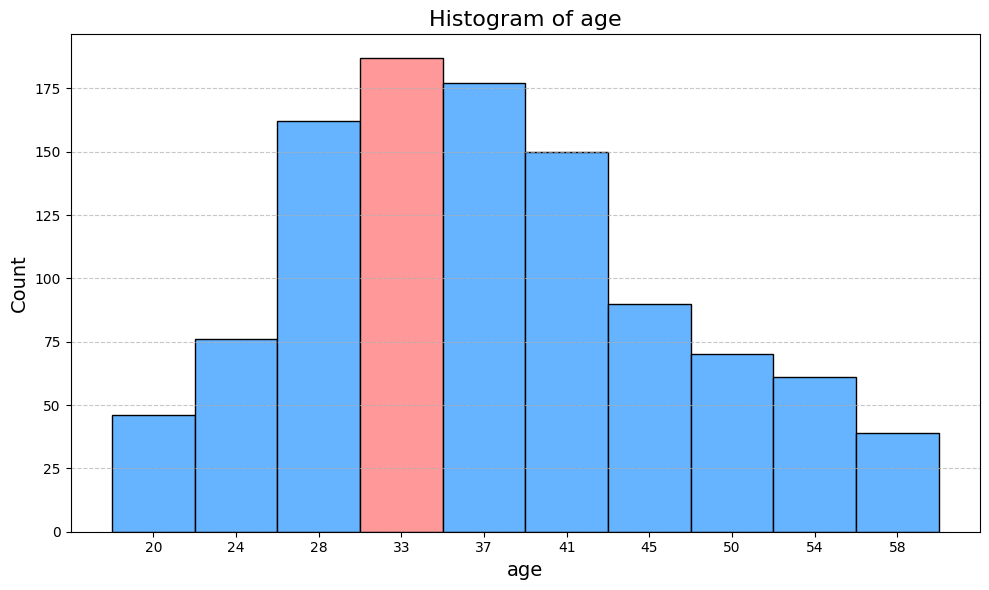

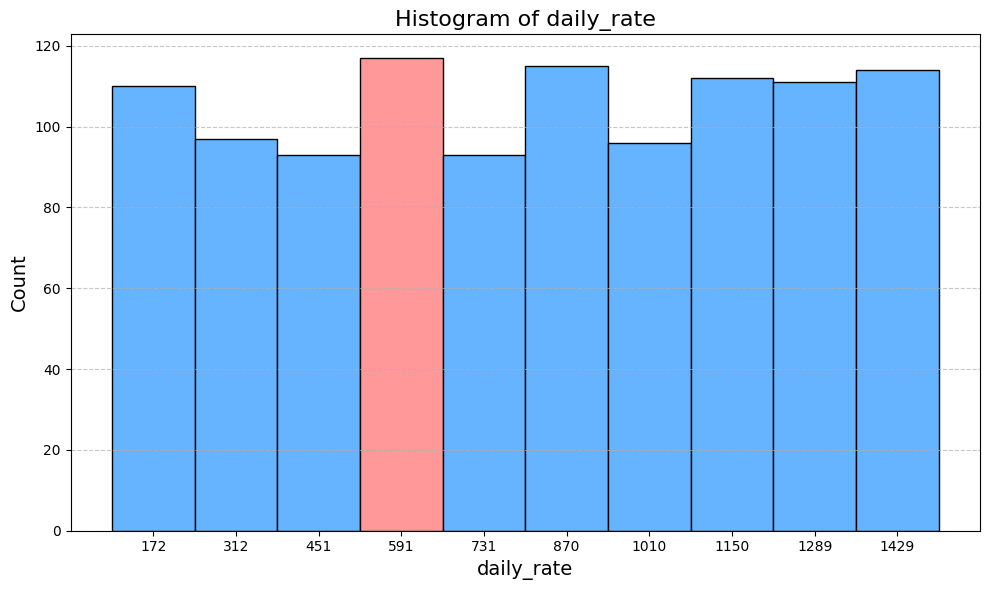

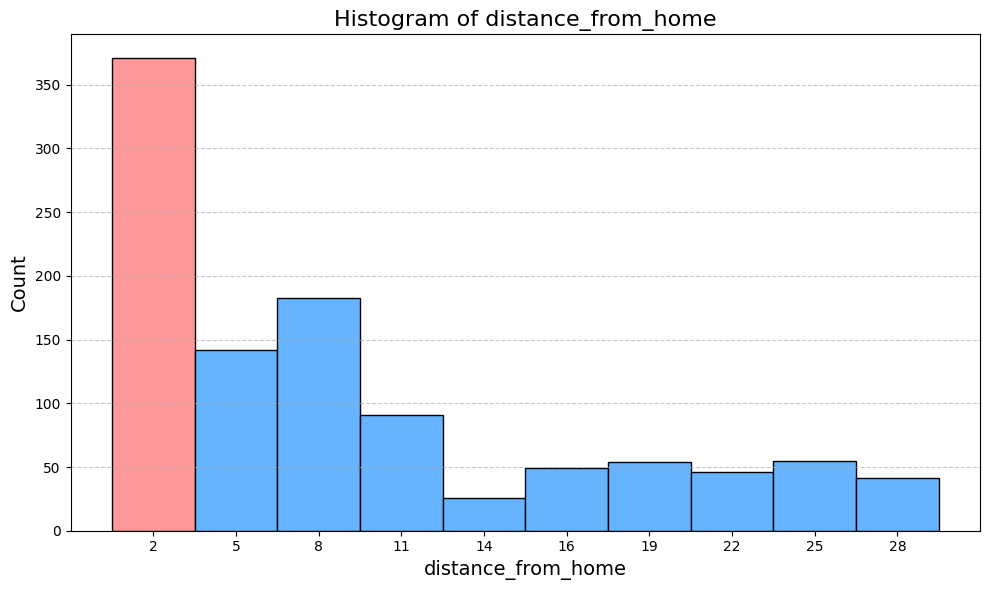

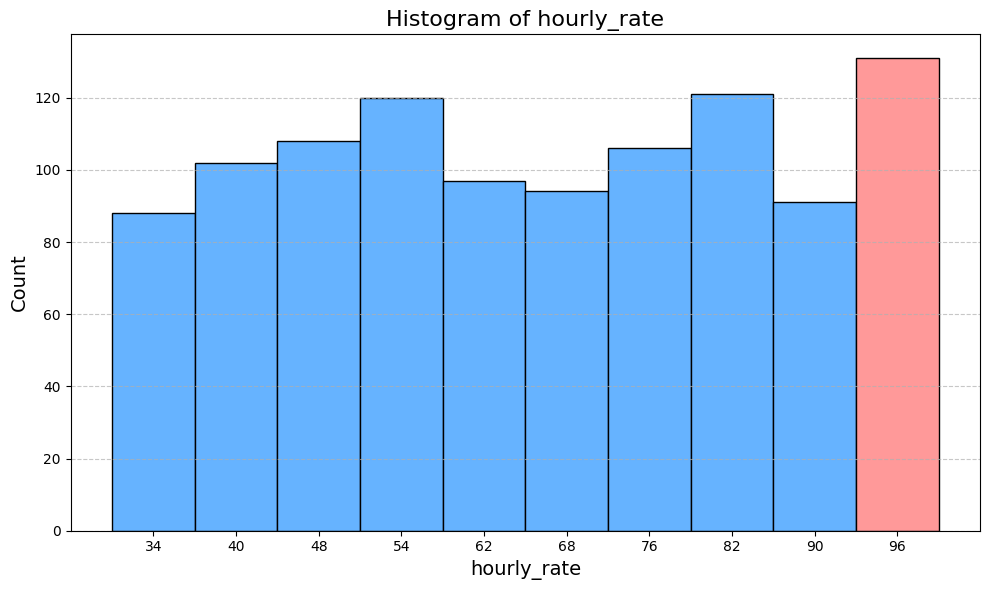

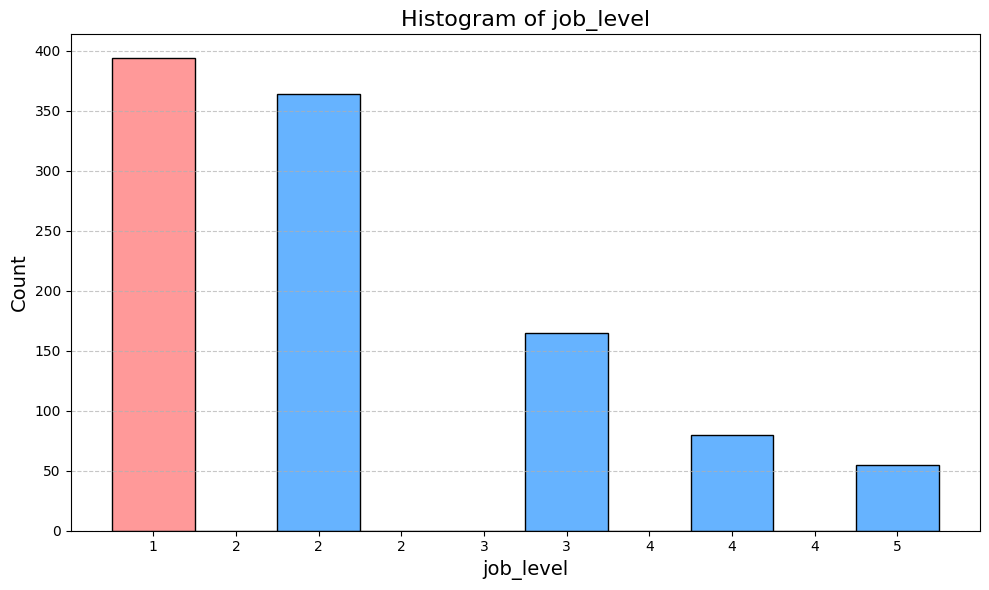

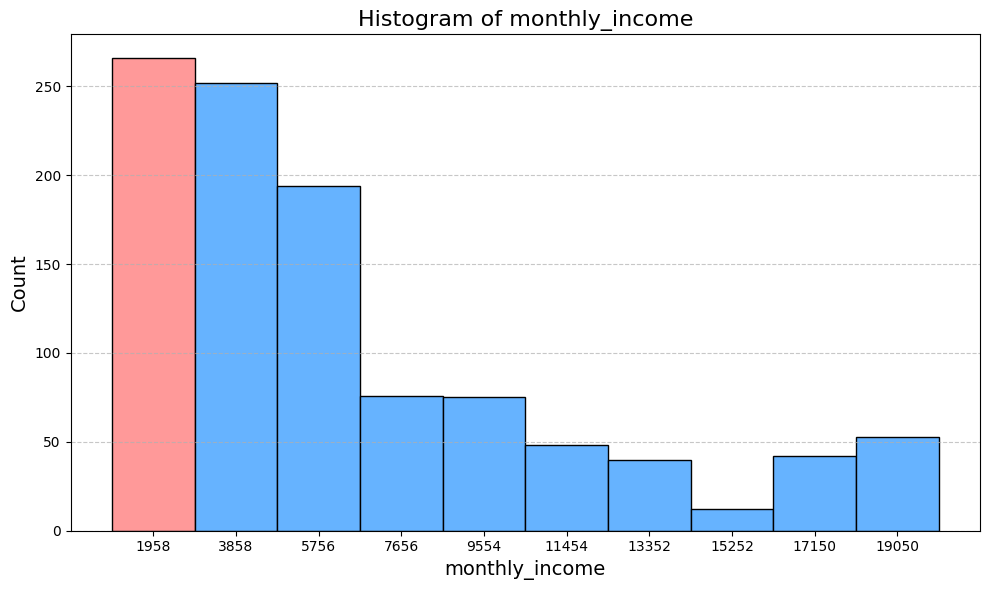

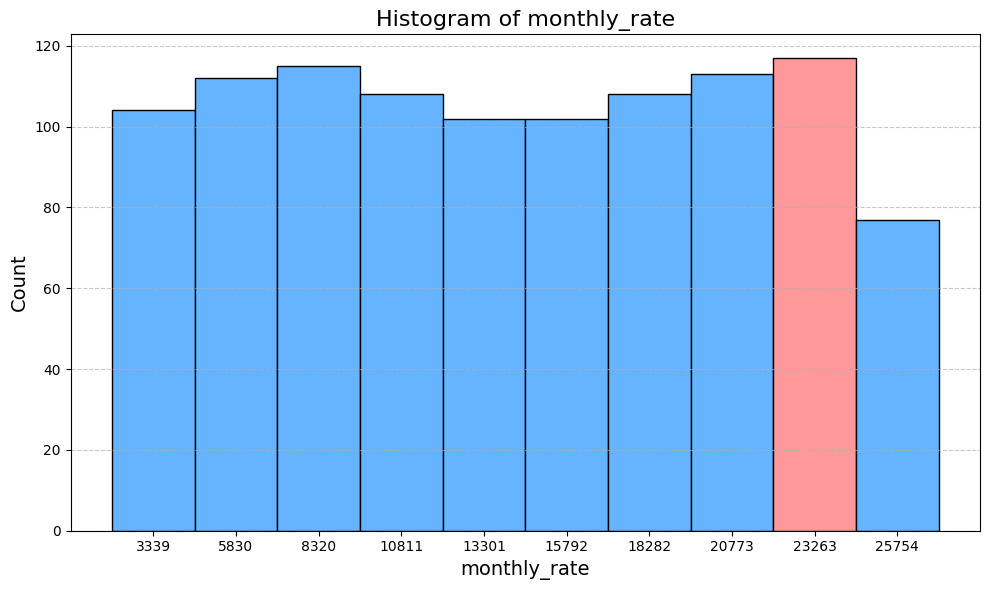

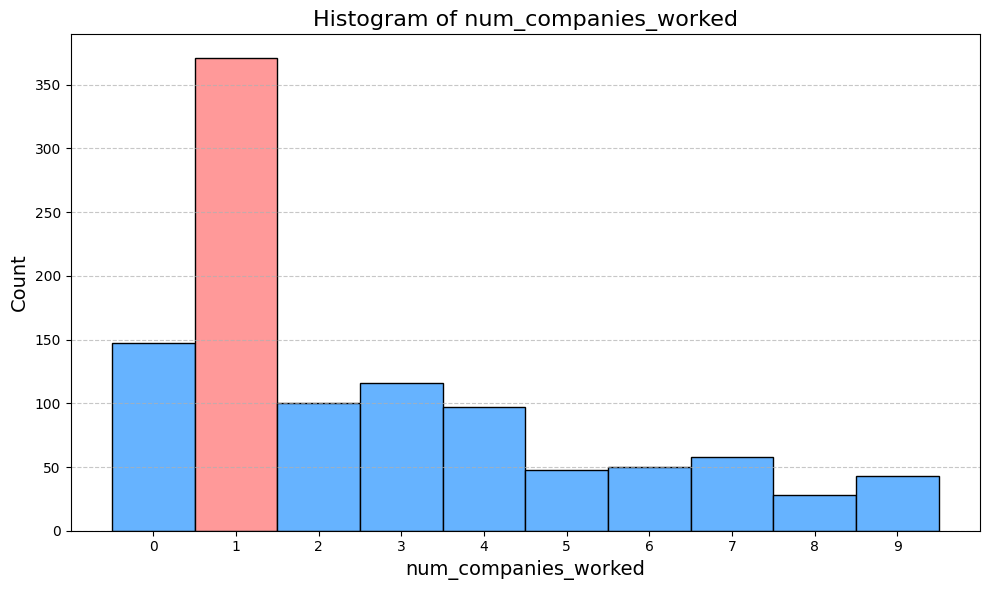

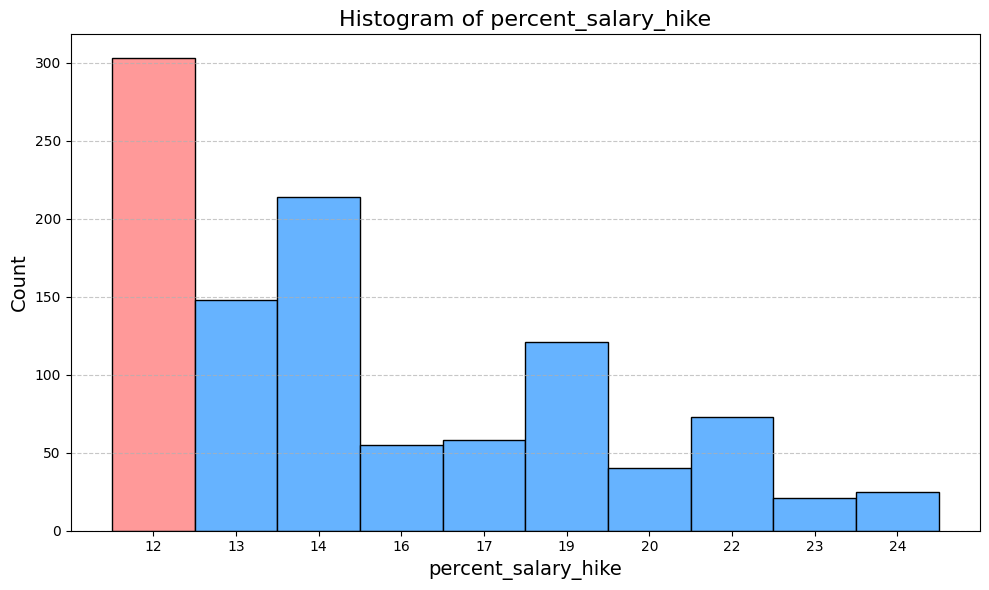

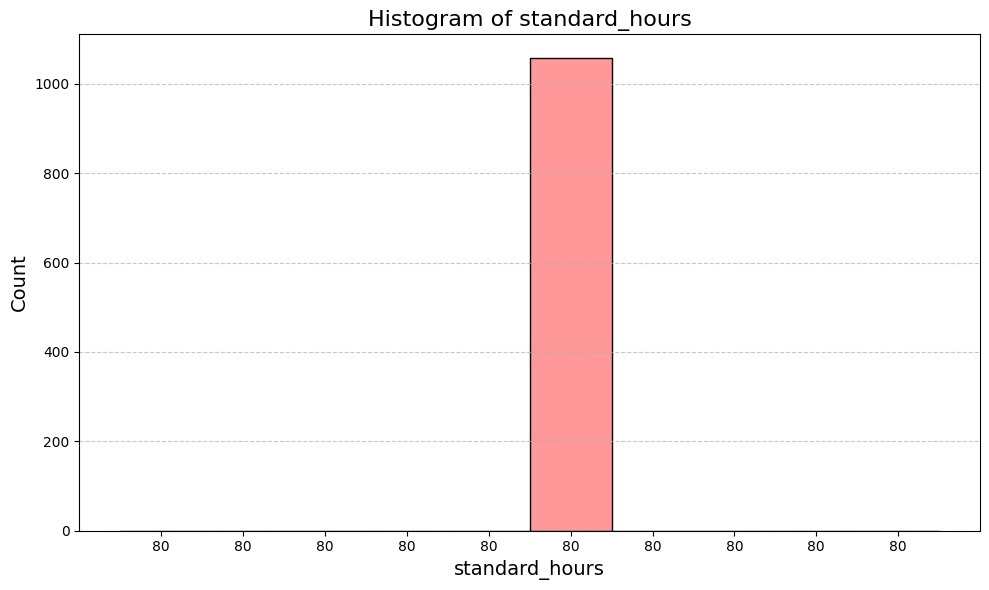

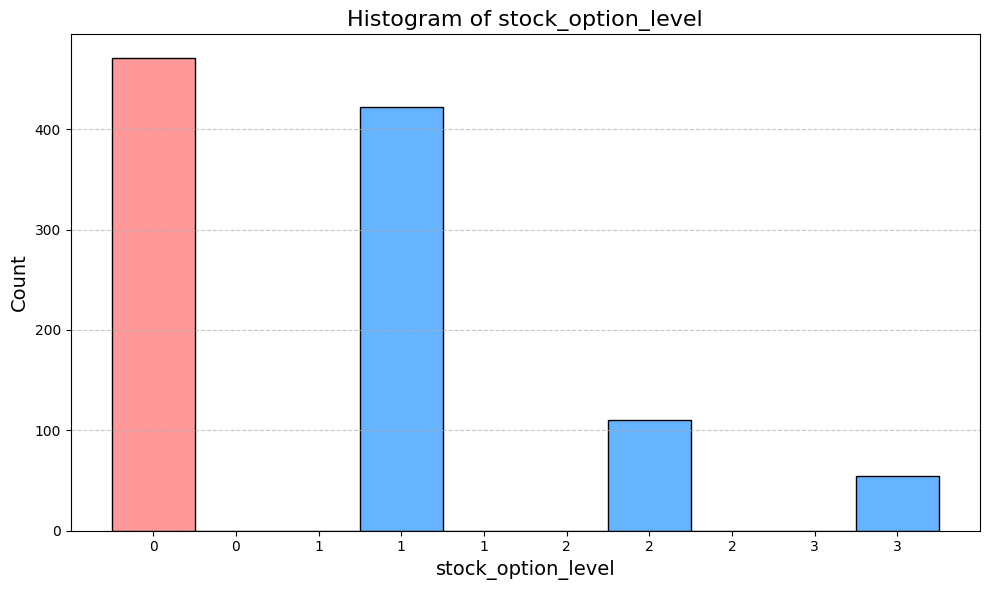

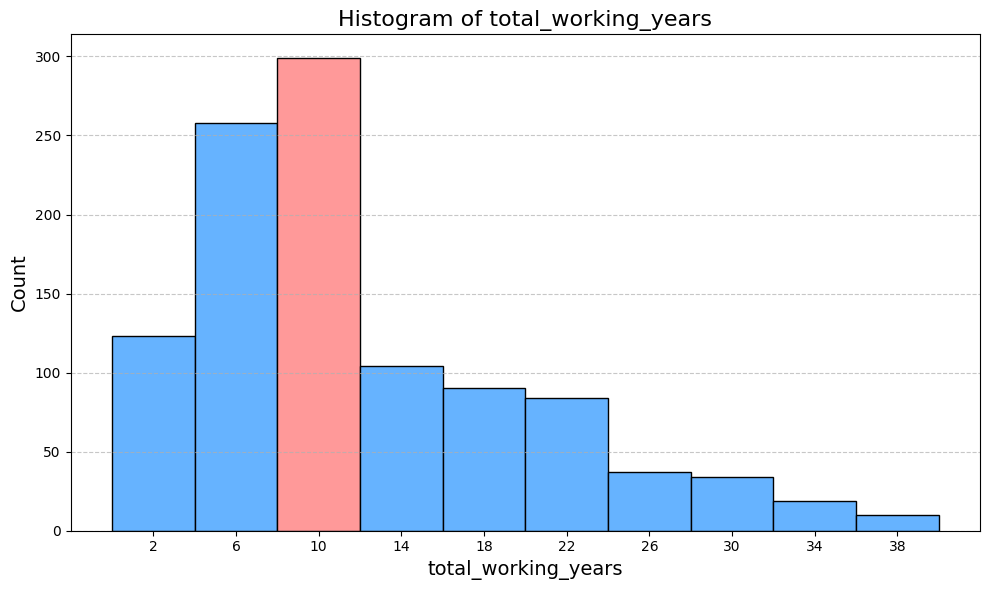

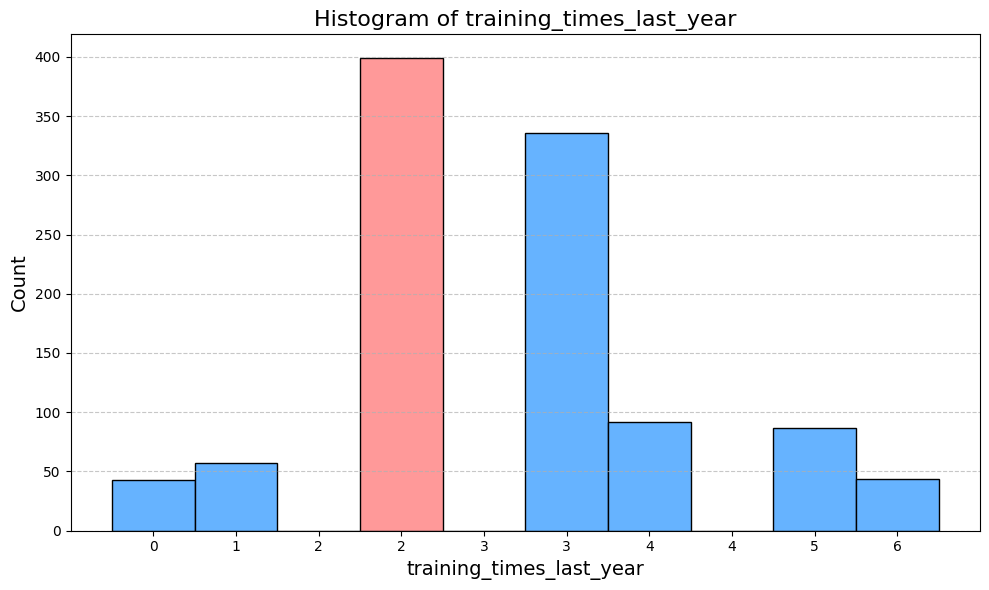

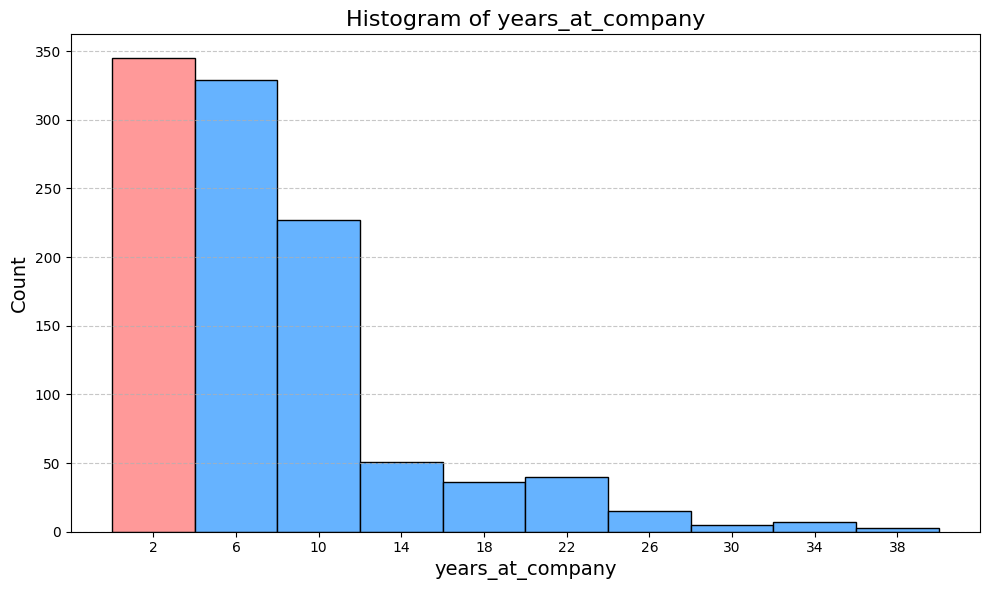

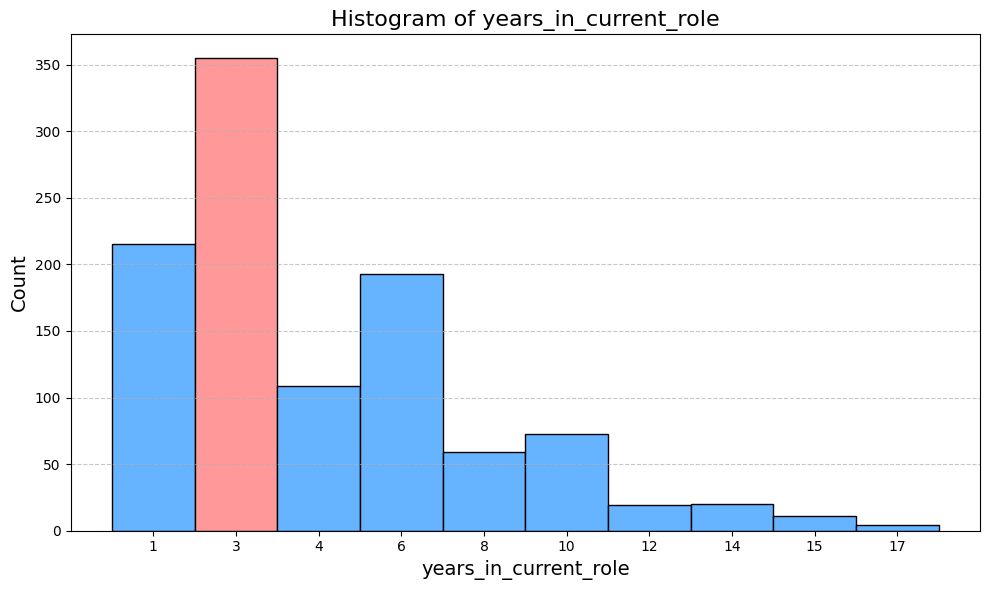

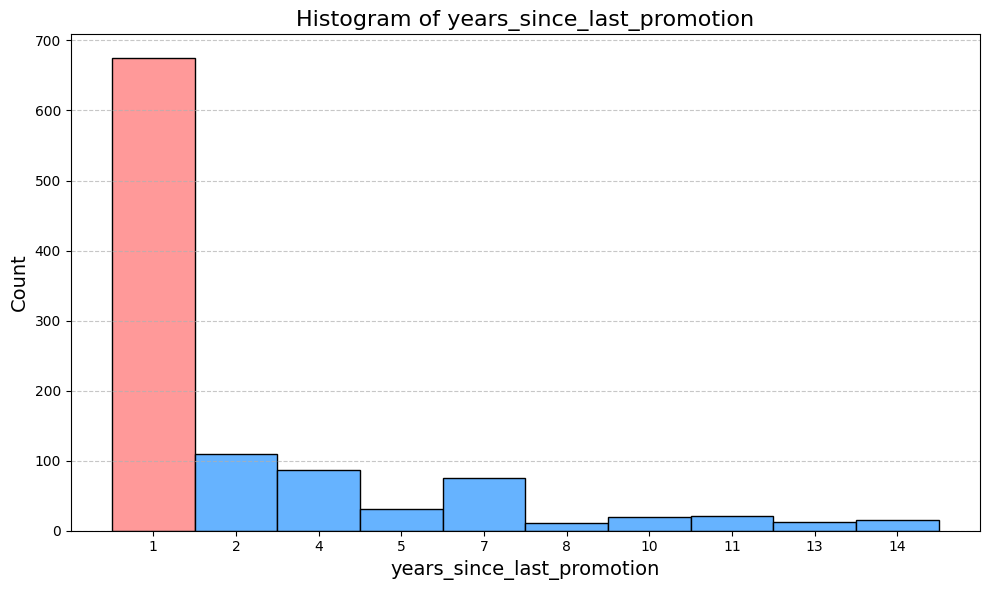

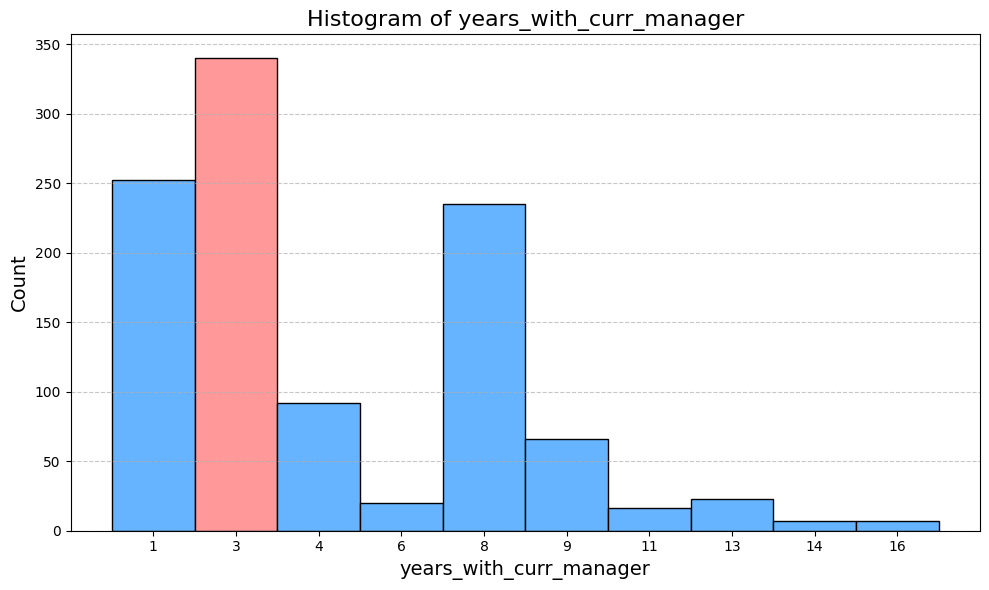

In [60]:
numerical = [
    "age", "daily_rate", "distance_from_home",
    "hourly_rate", "job_level", "monthly_income", "monthly_rate",
    "num_companies_worked", "percent_salary_hike",
    "standard_hours", "stock_option_level",
    "total_working_years", "training_times_last_year",
    "years_at_company", "years_in_current_role",
    "years_since_last_promotion", "years_with_curr_manager"
]

# Membuat histogram dalam frame yang berbeda
for feature in numerical:
    plt.figure(figsize=(10, 6))

    # Ambil nilai dari data
    data = exploratory_df[feature].dropna()

    # Hitung frekuensi dan bin
    counts, bins = np.histogram(data, bins=10)

    # Warna: merah untuk tertinggi, biru untuk lainnya
    colors = ['#ff9999' if count == max(counts) else '#66b3ff' for count in counts]

    # Gambar bar
    plt.bar(bins[:-1], counts, width=np.diff(bins), color=colors, edgecolor='black', align='edge')

    # Tambahkan label tengah bin ke sumbu X
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bin_centers, [f'{center:.0f}' for center in bin_centers], rotation=0)

    # Judul dan label
    plt.title(f'Histogram of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


Dari visualisasi diatas kita bisa melihat rentang nilai untuk fitir numerik
*   grafik berwarna merah menunjukkan nilai tertinggi dari sebuah fitur numerik



<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


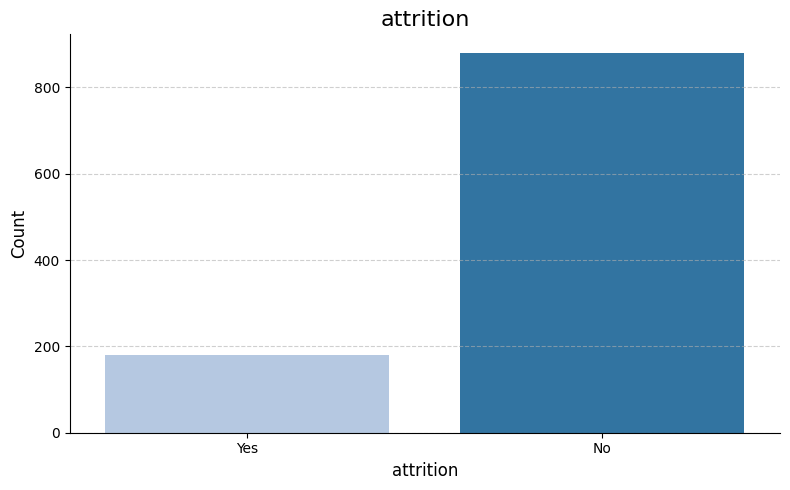

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


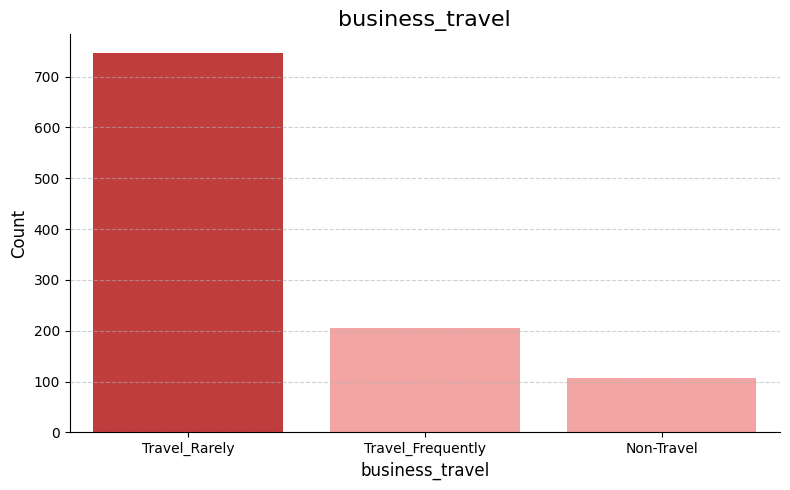

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


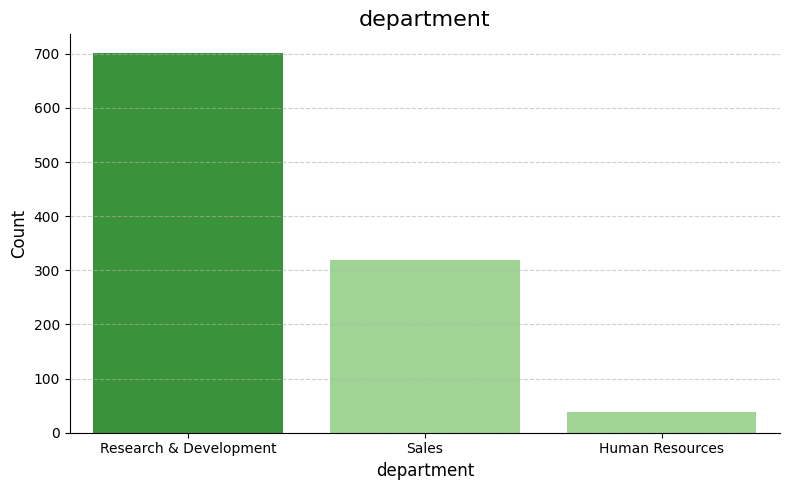

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


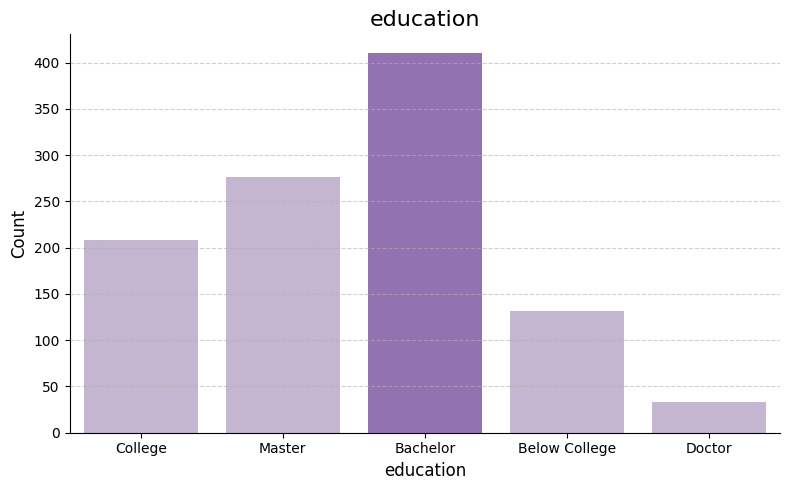

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


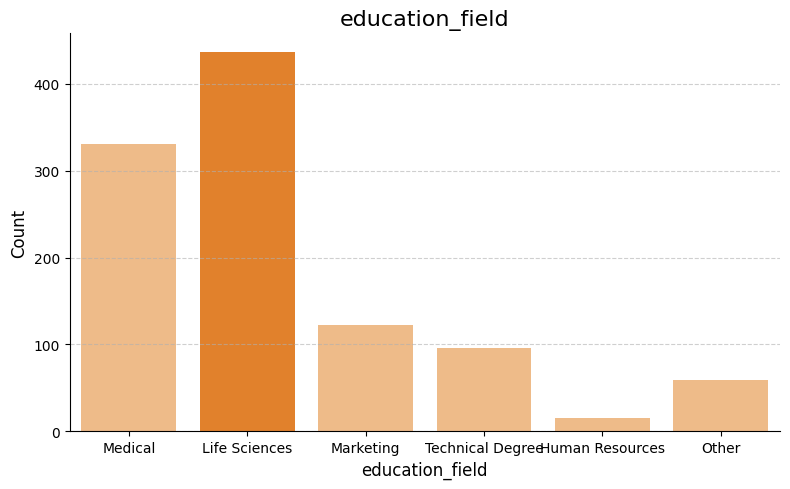

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


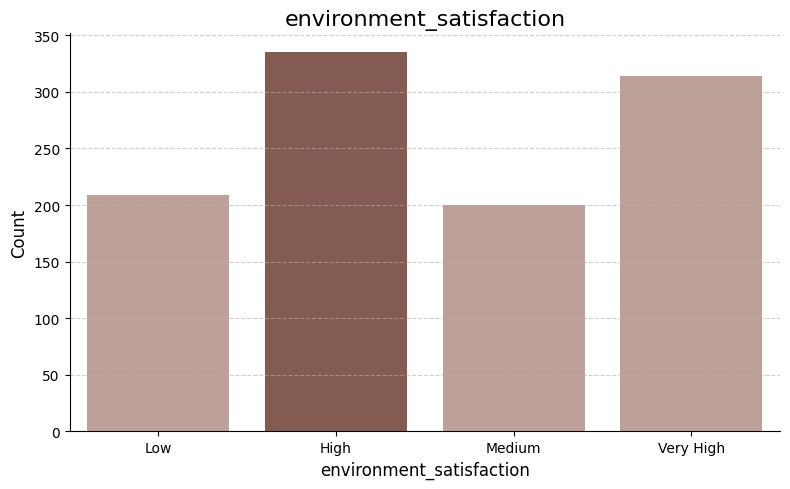

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


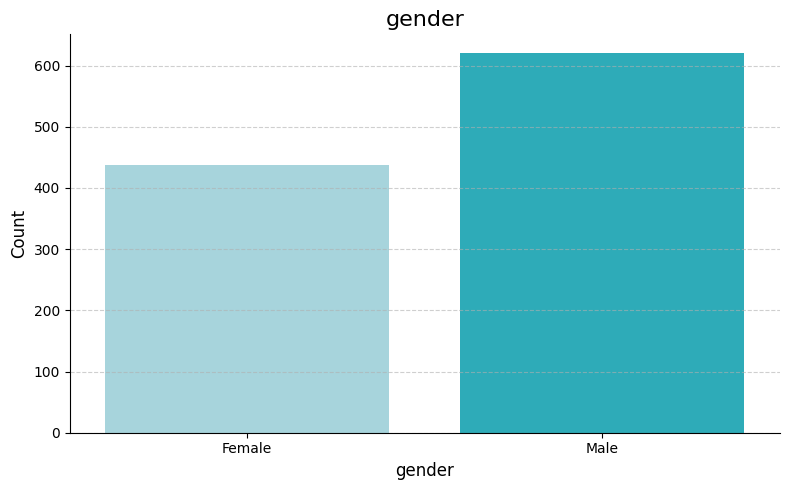

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


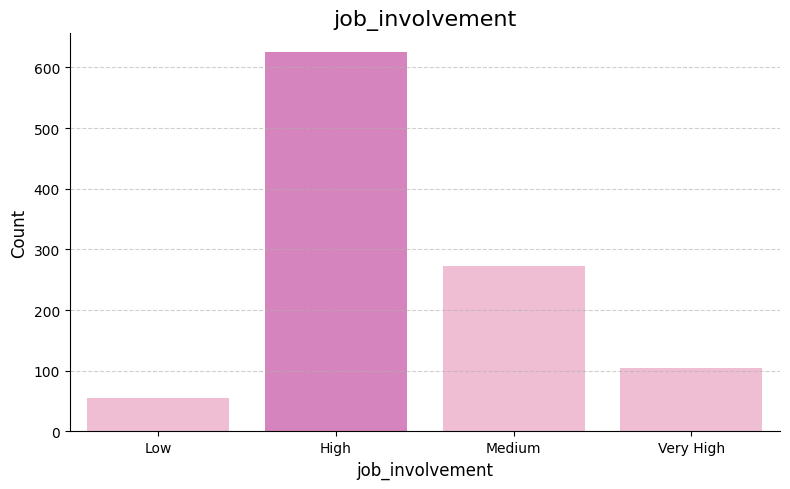

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


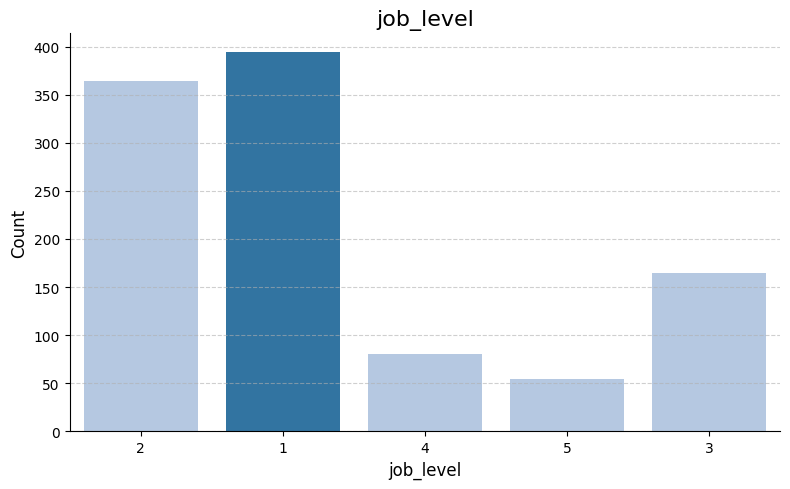

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


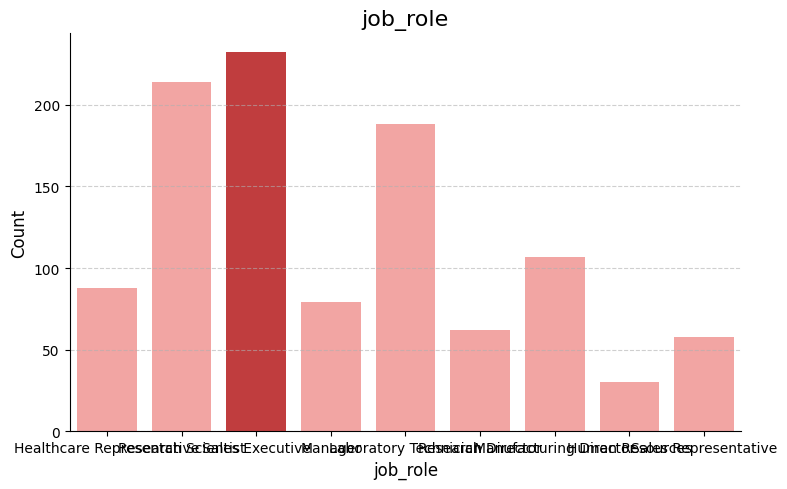

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


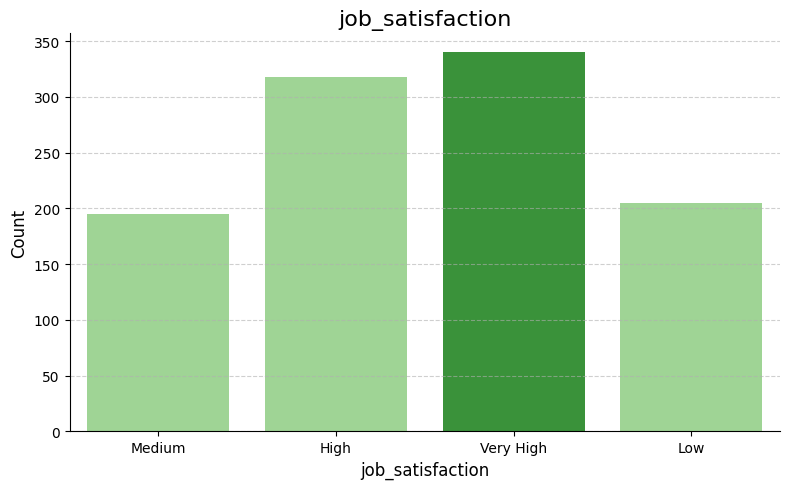

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


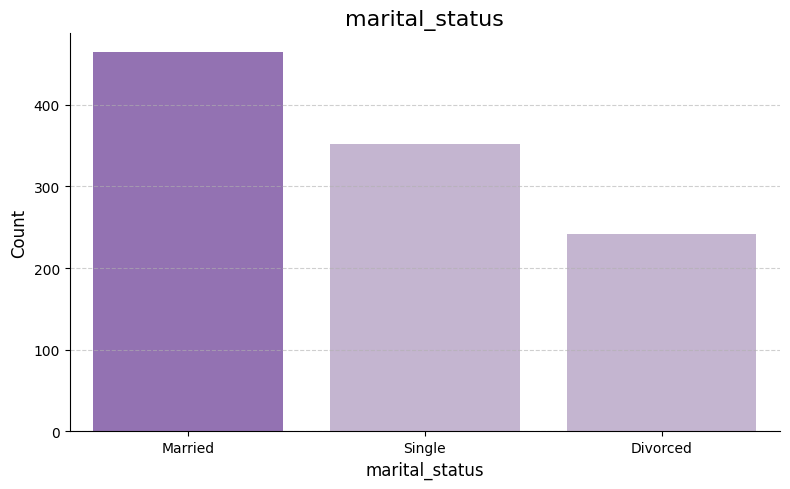

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


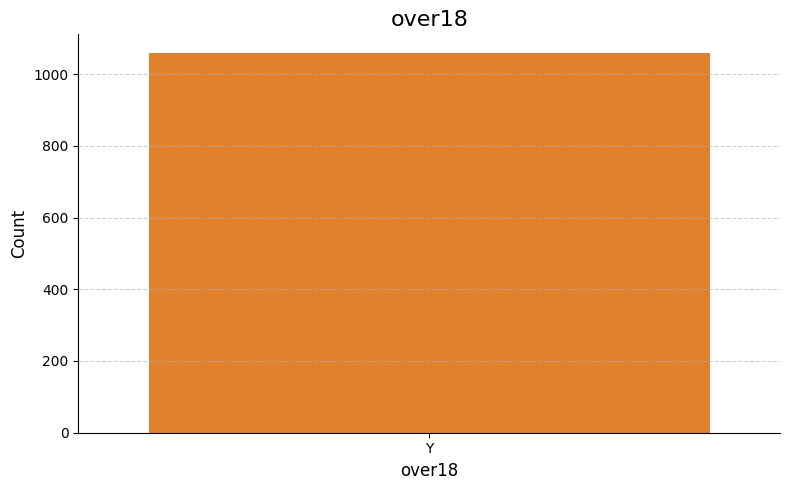

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


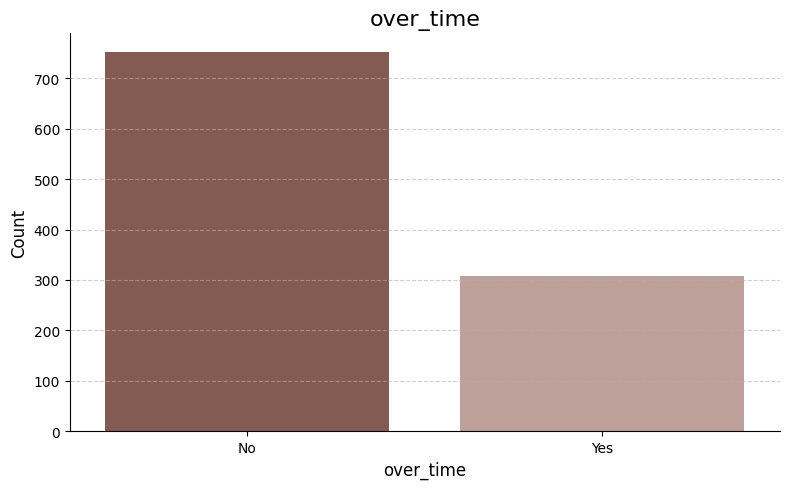

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


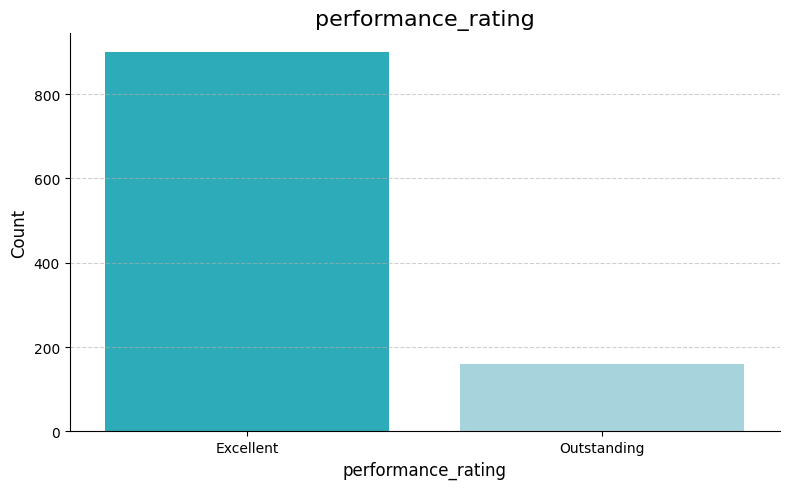

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


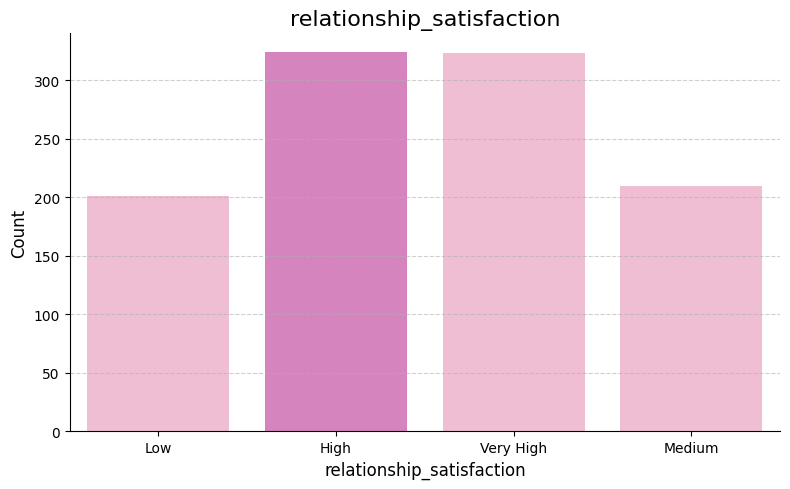

<ipython-input-61-795e777dc3c2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)


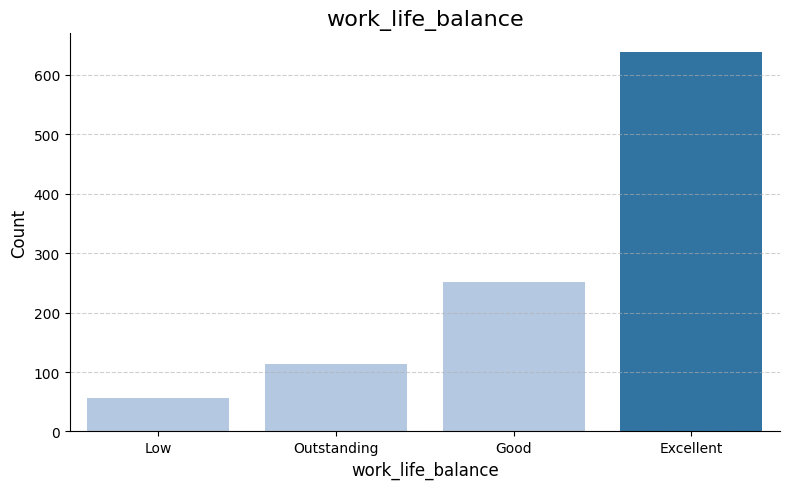

In [61]:
categorical = ["attrition", "business_travel", "department", "education", "education_field",
               "environment_satisfaction", "gender", "job_involvement", "job_level", "job_role",
               "job_satisfaction", "marital_status", "over18", "over_time", "performance_rating",
               "relationship_satisfaction", "work_life_balance"]

# Daftar pasangan warna (tua, muda)
color_pairs = [
    ('#1f77b4', '#aec7e8'),   # Biru
    ('#d62728', '#ff9896'),   # Merah
    ('#2ca02c', '#98df8a'),   # Hijau
    ('#9467bd', '#c5b0d5'),   # Ungu
    ('#ff7f0e', '#ffbb78'),   # Oranye
    ('#8c564b', '#c49c94'),   # Coklat
    ('#17becf', '#9edae5'),   # Cyan
    ('#e377c2', '#f7b6d2')    # Pink
]

# Loop untuk setiap fitur
for i, feature in enumerate(categorical):
    # Pilih warna berdasarkan urutan
    color_pair = color_pairs[i % len(color_pairs)]

    # Ambil kategori unik sesuai urutan pertama muncul
    categories = exploratory_df[feature].dropna().unique().tolist()

    # Hitung frekuensi dan kategori terbanyak
    counts = exploratory_df[feature].value_counts()
    max_count = counts.max()
    max_categories = counts[counts == max_count].index.tolist()

    # Buat warna: tua untuk paling banyak, muda untuk lainnya
    colors = [color_pair[0] if cat in max_categories else color_pair[1] for cat in categories]

    # Plot per fitur dalam frame baru
    plt.figure(figsize=(8, 5))
    sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)

    plt.title(feature, fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    sns.despine()

    plt.tight_layout()
    plt.show()


Dari visualisasi diatas kita bisa melihat rentang nilai untuk fitir kategori

*   grafik berwarna lebih tua menunjukkan nilai tertinggi dari sebuah fitur kategori

In [98]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,53))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

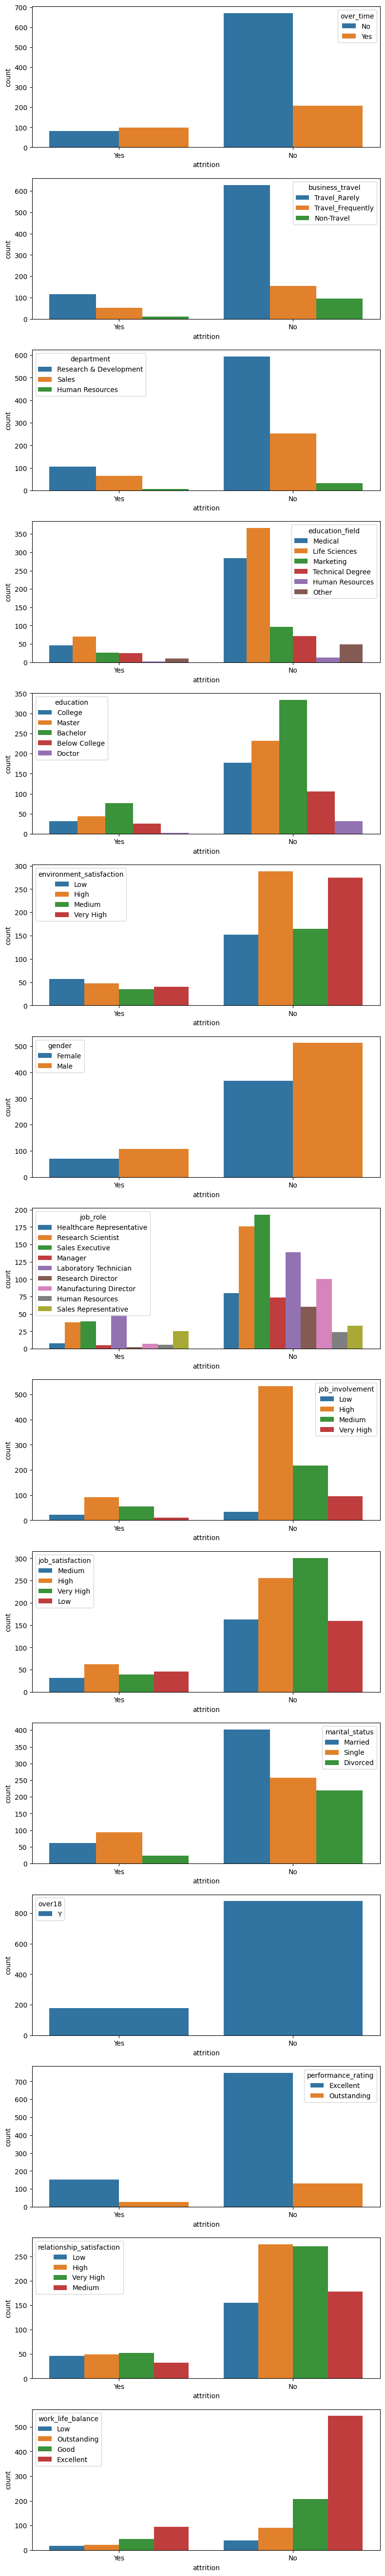

In [99]:
categorical_plot(
    features=["over_time", "business_travel", "department", "education_field", "education", "environment_satisfaction", "gender", "job_role", "job_involvement","job_satisfaction", "marital_status", "over18", "performance_rating", "relationship_satisfaction" , "work_life_balance"],
    df=exploratory_df,
    segment_feature="attrition"
)

Dari visualisasi, kita dapat melihat hubungan antara fitur-fitur kategorikal dengan fitur Attrition. Meskipun terlihat adanya perbedaan antara karyawan yang bertahan (Attrition = No) dan yang keluar (Attrition = Yes), sebagian besar fitur tidak menunjukkan pola yang dapat disimpulkan secara kuat karena distribusi datanya tidak merata. Namun, fitur OverTime menjadi pengecualian. Grafik menunjukkan bahwa meskipun jumlah karyawan yang melakukan lembur (OverTime = Yes) jauh lebih banyak dibandingkan yang tidak lembur, proporsi karyawan yang keluar dari perusahaan jauh lebih tinggi pada kelompok yang melakukan lembur tersebut. Hal ini mengindikasikan adanya korelasi antara lembur yang berlebihan dengan kemungkinan karyawan untuk resign.

In [64]:
# Salin semua kolom yang diperlukan
df_corr = clean_df[[
    "age",
    "attrition",
    "business_travel",
    "daily_rate",
    "distance_from_home",
    "education",
    "employee_count",
    "environment_satisfaction",
    "gender",
    "hourly_rate",
    "job_involvement",
    "job_level",
    "job_satisfaction",
    "marital_status",
    "monthly_income",
    "monthly_rate",
    "num_companies_worked",
    "over18",
    "over_time",
    "percent_salary_hike",
    "performance_rating",
    "relationship_satisfaction",
    "standard_hours",
    "stock_option_level",
    "total_working_years",
    "training_times_last_year",
    "work_life_balance",
    "years_at_company",
    "years_in_current_role",
    "years_since_last_promotion",
    "years_with_curr_manager"
]].copy()

# Encoding kolom kategorikal yang bisa dikonversi secara langsung
df_corr['over_time'] = df_corr['over_time'].map({'Yes': 1, 'No': 0})
df_corr['gender'] = df_corr['gender'].map({'Male': 1, 'Female': 0})
df_corr['over18'] = df_corr['over18'].map({'Y': 1})  # jika hanya 1 nilai, bisa di-drop nantinya
df_corr['business_travel'] = df_corr['business_travel'].map({
    'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2
})
df_corr['marital_status'] = df_corr['marital_status'].map({
    'Single': 0, 'Married': 1, 'Divorced': 2
})

df_corr.head()


,age,attrition,business_travel,daily_rate,distance_from_home,education,employee_count,environment_satisfaction,gender,hourly_rate,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
1,37,1.0,1,1141,11,2,1,1,0,61,...,1,80,0,15,2,1,1,0,0,0
2,51,1.0,1,1323,4,4,1,1,1,34,...,3,80,3,18,2,4,10,0,2,7
3,42,0.0,2,555,26,3,1,3,0,77,...,4,80,1,23,2,4,20,4,4,8
6,40,0.0,1,1124,1,2,1,2,1,57,...,3,80,3,6,2,2,4,3,0,2
7,55,1.0,1,725,2,3,1,4,1,78,...,4,80,1,24,2,3,5,2,1,4


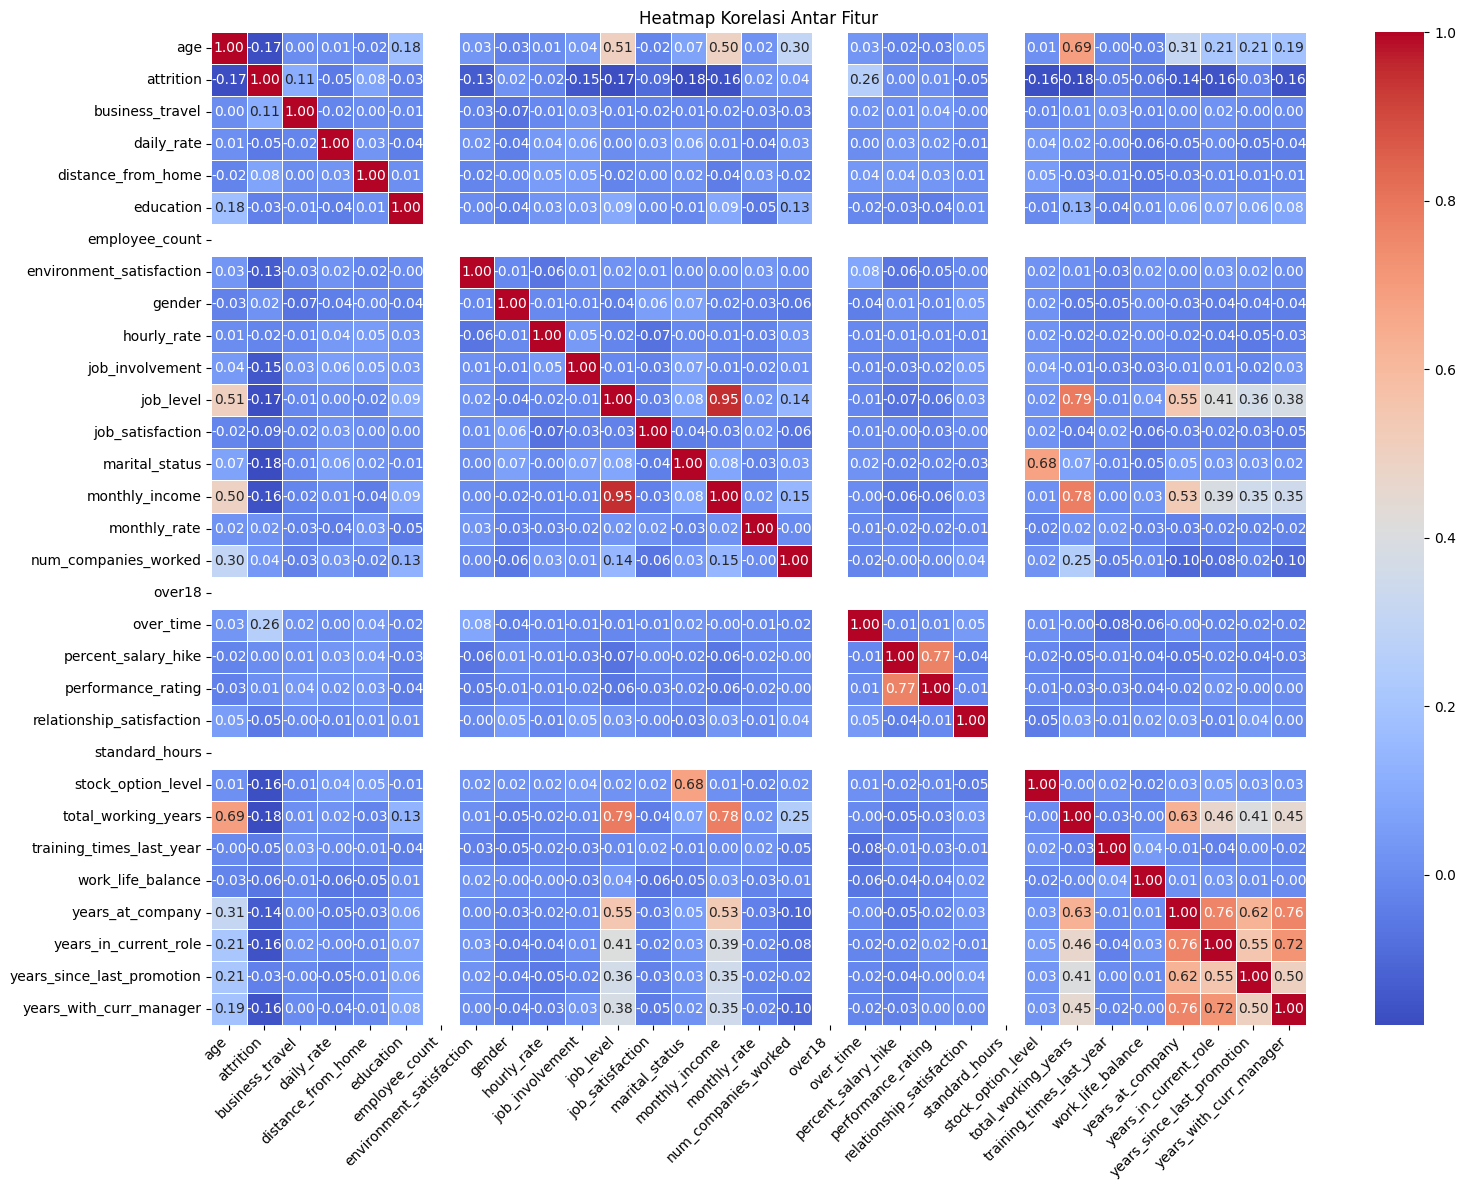

In [65]:
# Asumsikan df adalah DataFrame kamu
# Drop kolom non-numerik atau yang tidak relevan untuk korelasi

# Hitung korelasi
corr_matrix = df_corr.corr()

# Buat heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dari visualisasi confusion matrix di atas, kita dapat menilai sejauh mana model mampu membedakan antara karyawan yang keluar (Attrition = Yes) dan yang tetap bekerja (Attrition = No). Nilai yang semakin mendekati 1 atau -1 akan memiliki hubungan yang lebih kuat. Meskipun confusion matrix tidak secara eksplisit menampilkan fitur-fitur yang paling berpengaruh, pola kesalahan prediksi yang terlihat—seperti jumlah false positives dan false negatives—dapat memberi petunjuk bahwa terdapat fitur-fitur tertentu yang memiliki pengaruh kuat terhadap prediksi Attrition. Analisis lebih lanjut, seperti feature importance, diperlukan untuk mengidentifikasi fitur-fitur tersebut secara spesifik.

# Data Preparation / Preprocessing

In [66]:
# data model
from sklearn.preprocessing import LabelEncoder
df_model = clean_df.copy()
df_model = df_model.drop(columns=['employee_id'])
label_encoders = {}

for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [67]:
# Memisahkan feature dan target
X = df_model.drop(['attrition'], axis=1)
y = df_model['attrition']

In [68]:
# Step 2: Recursive Feature Elimination (RFE) for Feature Selection
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X, y) # Fit RFE on the encoded data

In [69]:
# Select top features
selected_features = X.columns[rfe_selector.support_]
X_selected = X[selected_features]

In [70]:
X_selected

,age,daily_rate,distance_from_home,hourly_rate,monthly_income,monthly_rate,over_time,percent_salary_hike,total_working_years,years_at_company
1,37,1141,11,61,4777,14382,0,15,15,1
2,51,1323,4,34,2461,10332,1,12,18,10
3,42,555,26,77,13525,14864,0,14,23,20
6,40,1124,1,57,7457,13273,1,22,6,4
7,55,725,2,78,19859,21199,1,13,24,5
...,...,...,...,...,...,...,...,...,...,...
1464,28,1366,24,72,8722,12355,0,12,10,10
1465,38,168,1,81,7861,15397,1,14,10,1
1467,28,1485,12,79,2515,22955,1,11,1,1
1468,40,458,16,74,3544,8532,0,16,6,4


In [71]:
# Step 3: Handle Data Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_selected, y)

In [72]:
# Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [73]:
# Summary of data preparation
data_summary = {
    "Selected Features": list(selected_features),
    "X_train Shape": X_train.shape,
    "X_test Shape": X_test.shape,
    "y_train Distribution": y_train.value_counts(),
    "y_test Distribution": y_test.value_counts()
}

In [74]:
data_summary

{'Selected Features': ['age',
  'daily_rate',
  'distance_from_home',
  'hourly_rate',
  'monthly_income',
  'monthly_rate',
  'over_time',
  'percent_salary_hike',
  'total_working_years',
  'years_at_company'],
 'X_train Shape': (1406, 10),
 'X_test Shape': (352, 10),
 'y_train Distribution': attrition
 1.0    705
 0.0    701
 Name: count, dtype: int64,
 'y_test Distribution': attrition
 0.0    178
 1.0    174
 Name: count, dtype: int64}

In [75]:
# split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, test_size=0.2, random_state=42)

In [76]:
# Menerapkan SMOTE untuk mengatasi imbalance
from imblearn.combine import SMOTEENN
smote = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [77]:
# Menggabungkan kembali data
df_resampled = pd.concat([pd.DataFrame(X_train_res, columns=X_train.columns),
                          pd.Series(y_train_res, name='Attrition')], axis=1)

# Modeling

In [78]:
# Step 1: Logistic Regression (Baseline Model)
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [79]:
# Predictions for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

In [80]:
# Step 2: Random Forest (Complex Model)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)

In [82]:
# Step 3: XGBoost (Advanced Model)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [83]:
# Predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)

In [84]:
# Step 4: Support Vector Machine (Advanced Model)
svm_model = SVC(random_state=42, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [85]:
# Predictions for SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluation

In [86]:
# Metrics for Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_precision = precision_score(y_test, y_pred_logistic)
logistic_recall = recall_score(y_test, y_pred_logistic)
logistic_f1 = f1_score(y_test, y_pred_logistic)

In [87]:
# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [88]:
# Metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

In [89]:
# Metrics for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
# Comparison Table
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM"],
    "Accuracy": [logistic_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
    "Precision": [logistic_precision, rf_precision, xgb_precision, svm_precision],
    "Recall": [logistic_recall, rf_recall, xgb_recall, svm_recall],
    "F1-Score": [logistic_f1, rf_f1, xgb_f1, svm_f1]
})

In [91]:
model_comparison

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.844340,0.714286,0.138889,0.232558
1,Random Forest,0.839623,0.625000,0.138889,0.227273
2,XGBoost,0.816038,0.421053,0.222222,0.290909
3,SVM,0.830189,0.000000,0.000000,0.000000


In [92]:
# Detailed Classification Reports
print("\nClassification Report: Logistic Regression")
print(classification_report(y_test, y_pred_logistic))

print("\nClassification Report: Random Forest")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report: XGBoost")
print(classification_report(y_test, y_pred_xgb))

print("\nClassification Report: SVM")
print(classification_report(y_test, y_pred_svm))


Classification Report: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       176
         1.0       0.71      0.14      0.23        36

    accuracy                           0.84       212
   macro avg       0.78      0.56      0.57       212
weighted avg       0.83      0.84      0.80       212


Classification Report: Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       176
         1.0       0.62      0.14      0.23        36

    accuracy                           0.84       212
   macro avg       0.74      0.56      0.57       212
weighted avg       0.81      0.84      0.79       212


Classification Report: XGBoost
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       176
         1.0       0.42      0.22      0.29        36

    accuracy                           0.82       212
   macro avg  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


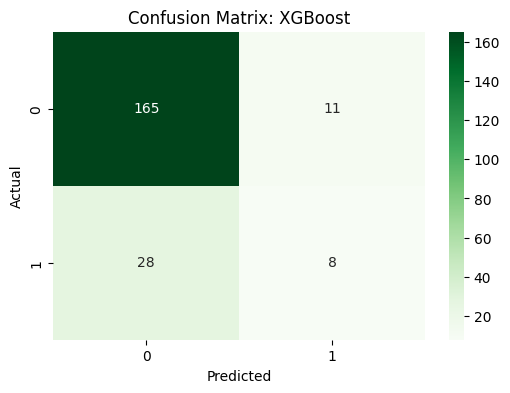

In [93]:
# Confusion Matrix Visualization for XGBoost
xgb_confusion_matrix = sklearn_confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_confusion_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [94]:
# Simpan model
joblib.dump(xgb_model, 'xgb_attrition_model.pkl')

['xgb_attrition_model.pkl']

In [95]:
!pip freeze > requirements.txt

In [103]:
!cat requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.21.0.37.6
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confect